In [137]:
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score,f1_score,auc,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [138]:
data1 = pd.read_csv("diabetes.csv")
X = data1.drop(columns = 'Outcome').copy()
Y= data1['Outcome'].copy()
data = X
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [139]:
# KNeighborsClassifier?


In [140]:
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2,shuffle =False)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle =False)

In [141]:
mx1,mx2=0,0
ts=[]
vl=[]

for i in range(100):
    knn = KNeighborsClassifier(n_neighbors=i+1, metric='euclidean')
    knn.fit(X_train, y_train)  
    y_ts=knn.predict(X_test)
    y_vl= knn.predict(X_val)
    p=accuracy_score(y_val,y_vl)
    ts.append(accuracy_score(y_test,y_ts))
    vl.append(accuracy_score(y_val,y_vl))
#     q=confusion_matrix(y_test,y_pred)
#     print(i,"_",p,q)
#     if(mx1<(q[0][0]+q[1][1])):
    if(mx1<p):
        mx1=p
        mx2=i
print(mx2,mx1)

33 0.7792207792207793


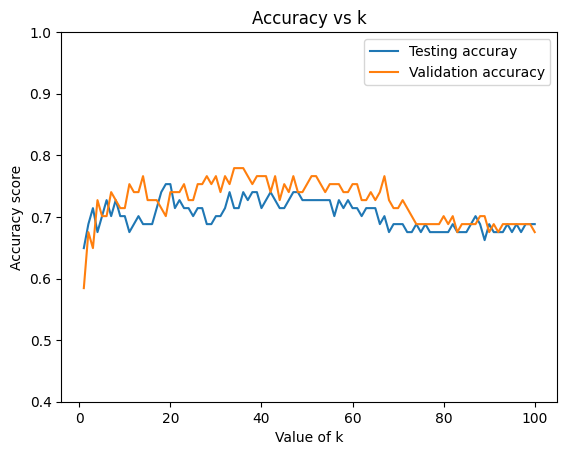

In [142]:
lst=list(range(1,101))
plt.plot(lst,ts)
plt.plot(lst,vl)
plt.xlabel("Value of k")
plt.ylabel("Accuracy score")
plt.title("Accuracy vs k")
plt.legend(["Testing accuray","Validation accuracy"])
plt.ylim(0.4,1)
plt.show()

0.6661991584852736


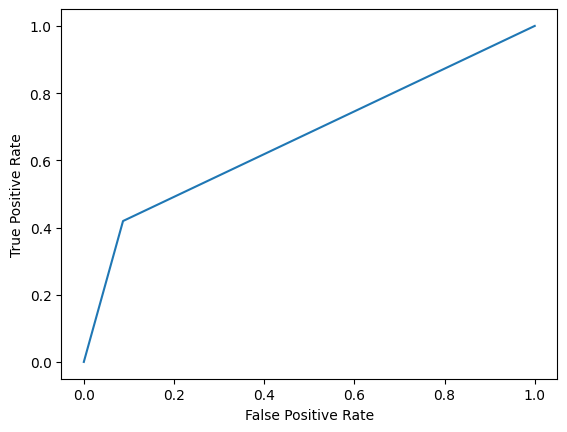

In [143]:
knn = KNeighborsClassifier(n_neighbors=34, metric='euclidean')
start=time.time()
knn.fit(X_train, y_train) 
stop=time.time()
y_pred=knn.predict(X_test)
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, y_pred)
print(roc_auc_score(y_test, y_pred))

In [147]:
knn = KNeighborsClassifier(n_neighbors=34, metric='euclidean')
start=time.time()
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
y_ts = knn.predict(X_train)
# print(y_pred)
print(confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_train,y_ts))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))#auc
print("precision_score:",precision_score(y_test,y_pred))
print(f"Training time: {stop-start}s")


[[42  4]
 [18 13]]
accuracy_score 0.754071661237785
accuracy_score 0.7142857142857143
recall_score 0.41935483870967744
f1_score: 0.5416666666666666
roc_auc_score: 0.6661991584852736
precision_score: 0.7647058823529411
Training time: -113.28125619888306s


In [134]:
knn = KNeighborsClassifier( metric='euclidean')
start=time.time()
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
# print(y_pred)
print(confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))#auc
print("precision_score:",precision_score(y_test,y_pred))
print(f"Training time: {stop-start}s")


[[36 10]
 [13 18]]
accuracy_score 0.7012987012987013
recall_score 0.5806451612903226
f1_score: 0.6101694915254238
roc_auc_score: 0.6816269284712483
precision_score: 0.6428571428571429
Training time: -233.52790522575378s


In [101]:
a=0
b=0
tv=[]
ts=[]
for i in range(100):
#     p=str(i+1)
    model=LogisticRegression(C=i*0.01+0.01,max_iter=10000)
    model.fit(X_train,y_train)
    y_prd=model.predict(X_test)
    tv.append(accuracy_score(y_val,y_vl))
    ts.append(accuracy_score(y_test,y_pred))
    y_pred=model.predict(X_test)
    p=accuracy_score(y_val,y_vl)
    if a<p:
        a=p
#         b=i
print(a,b)
    
    

0.6753246753246753 0


In [102]:
# LogisticRegression?
#saga ,sag,liblinear,lbfgs
# penality l1,l2,'elasticnet'


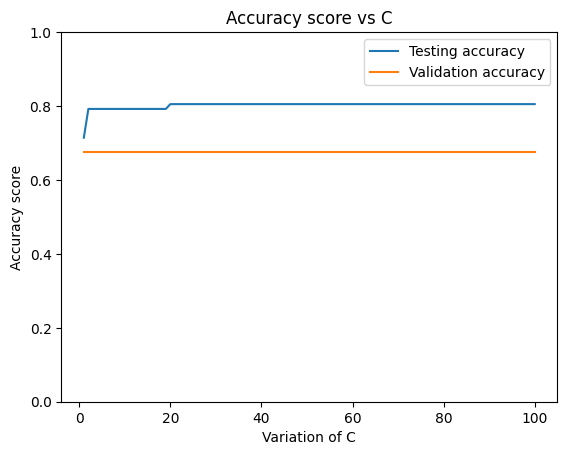

In [103]:

plt.plot(lst,ts)
plt.plot(lst,tv)
legend=(["Training accuracy","Testing acuracy"])
plt.xlabel("Variation of C")
plt.ylabel("Accuracy score")
plt.ylim(0,1)
plt.legend(["Testing accuracy","Validation accuracy"])
plt.title("Accuracy score vs C")
plt.show()

In [104]:
model=LogisticRegression(C=0.00001,max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(model.intercept_,model.coef_)


0.7012987012987013
[-3.19031424] [[0.00160887 0.01716973 0.00028649 0.0010806  0.0009771  0.00530829
  0.00013204 0.00425853]]


In [105]:
model=LogisticRegression(C=0.1,max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(model.intercept_,model.coef_)


0.7922077922077922
[-8.29715196] [[ 0.11559956  0.03268671 -0.01083777 -0.00162356 -0.00066766  0.10197082
   0.51109427  0.01073545]]


In [127]:
model=LogisticRegression(penalty='l1',solver='liblinear',C=1.0,max_iter=10000)#inv regu strength
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(model.intercept_,model.coef_)

0.8051948051948052
[-7.87315031] [[ 1.17731737e-01  3.12399933e-02 -1.14983462e-02 -2.37334719e-03
  -6.82554769e-04  9.38944426e-02  8.93167296e-01  8.04772132e-03]]


In [107]:
model=LogisticRegression(C=2.0,max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(model.intercept_,model.coef_)

0.7922077922077922
[-8.55489011] [[ 1.21094349e-01  3.28889961e-02 -1.06039768e-02 -2.51944881e-03
  -8.34549383e-04  1.02558705e-01  1.00773424e+00  9.71433678e-03]]


0.7738429172510519


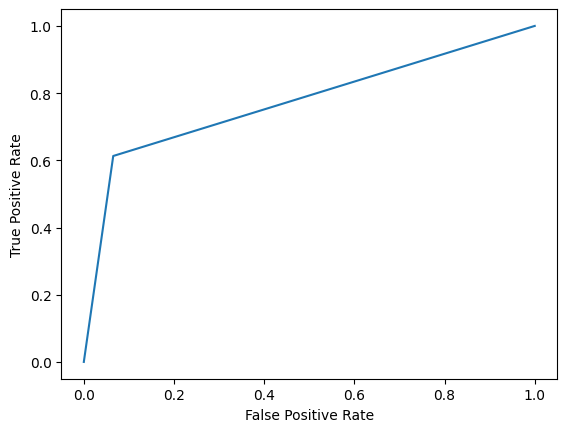

In [148]:
model=LogisticRegression(C=0.5,max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    
plot_roc_curve(y_test, y_pred)
print(roc_auc_score(y_test, y_pred))

In [149]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_ts=model.predict(X_train)
# print(y_pred)
print(confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_train,y_ts))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))#auc
print("precision_score:",precision_score(y_test,y_pred))
# print(f"Training time: {stop-start}s")


[[43  3]
 [12 19]]
accuracy_score 0.7899022801302932
accuracy_score 0.8051948051948052
recall_score 0.6129032258064516
f1_score: 0.7169811320754716
roc_auc_score: 0.7738429172510519
precision_score: 0.8636363636363636


In [135]:
GaussianNB?

In [150]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

0.7251051893408134


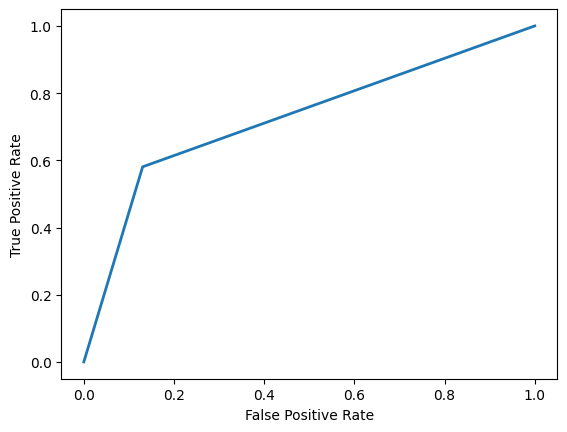

In [151]:
y_pred=nb.predict(X_test)
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr,linewidth=2)
#     , scalex=True, scaley=True,, data=None, **kwargs)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, y_pred)
print(roc_auc_score(y_test, y_pred))

In [152]:
y_pred =nb.predict(X_test)
# print(y_pred)
y_ts=model.predict(X_train)
print(confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_train,y_ts))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))#auc
print("precision_score:",precision_score(y_test,y_pred))
print(f"Training time: {stop-start}s")


[[40  6]
 [13 18]]
accuracy_score 0.7899022801302932
accuracy_score 0.7532467532467533
recall_score 0.5806451612903226
f1_score: 0.6545454545454547
roc_auc_score: 0.7251051893408134
precision_score: 0.75
Training time: -113.28125619888306s


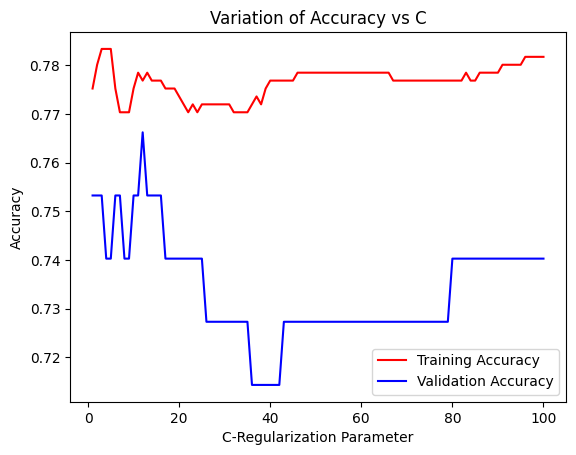

In [113]:
from sklearn.svm import SVC
accu_train = []
accu_val = []
for c in range (100):
    model = SVC(kernel = 'poly', degree = 2, C = c+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("C-Regularization Parameter")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs C")
plt.show()


In [114]:
# ?auc

0.7752442996742671
0.7662337662337663
[[44 16]
 [ 2 15]]
0.4838709677419355
0.8823529411764706
0.625
0.7201963534361852


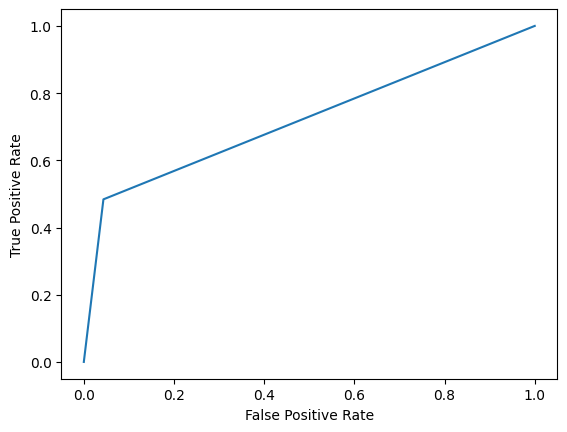

In [115]:
model = SVC(kernel = 'poly', degree = 2, C =1)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))

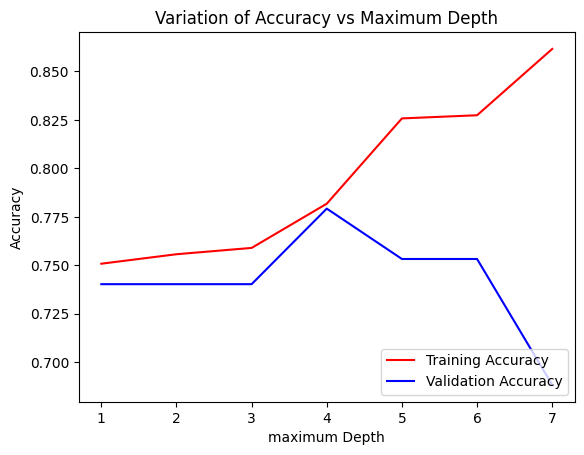

In [116]:

from sklearn.tree import DecisionTreeClassifier


accu_train = []
accu_val = []
for d in range (7):
    model = dtree=DecisionTreeClassifier(max_depth = d+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,8))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("maximum Depth")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs Maximum Depth")
plt.show()



0.7817589576547231
0.7662337662337663
[[33  5]
 [13 26]]
0.8387096774193549
0.6666666666666666
0.7428571428571428
0.7780504908835906


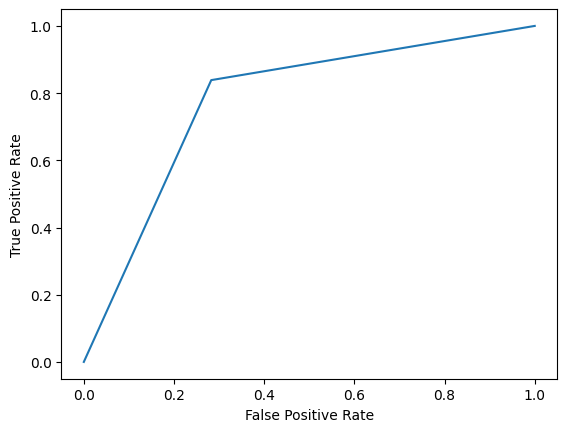

In [117]:
model =DecisionTreeClassifier(max_depth = 4)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))

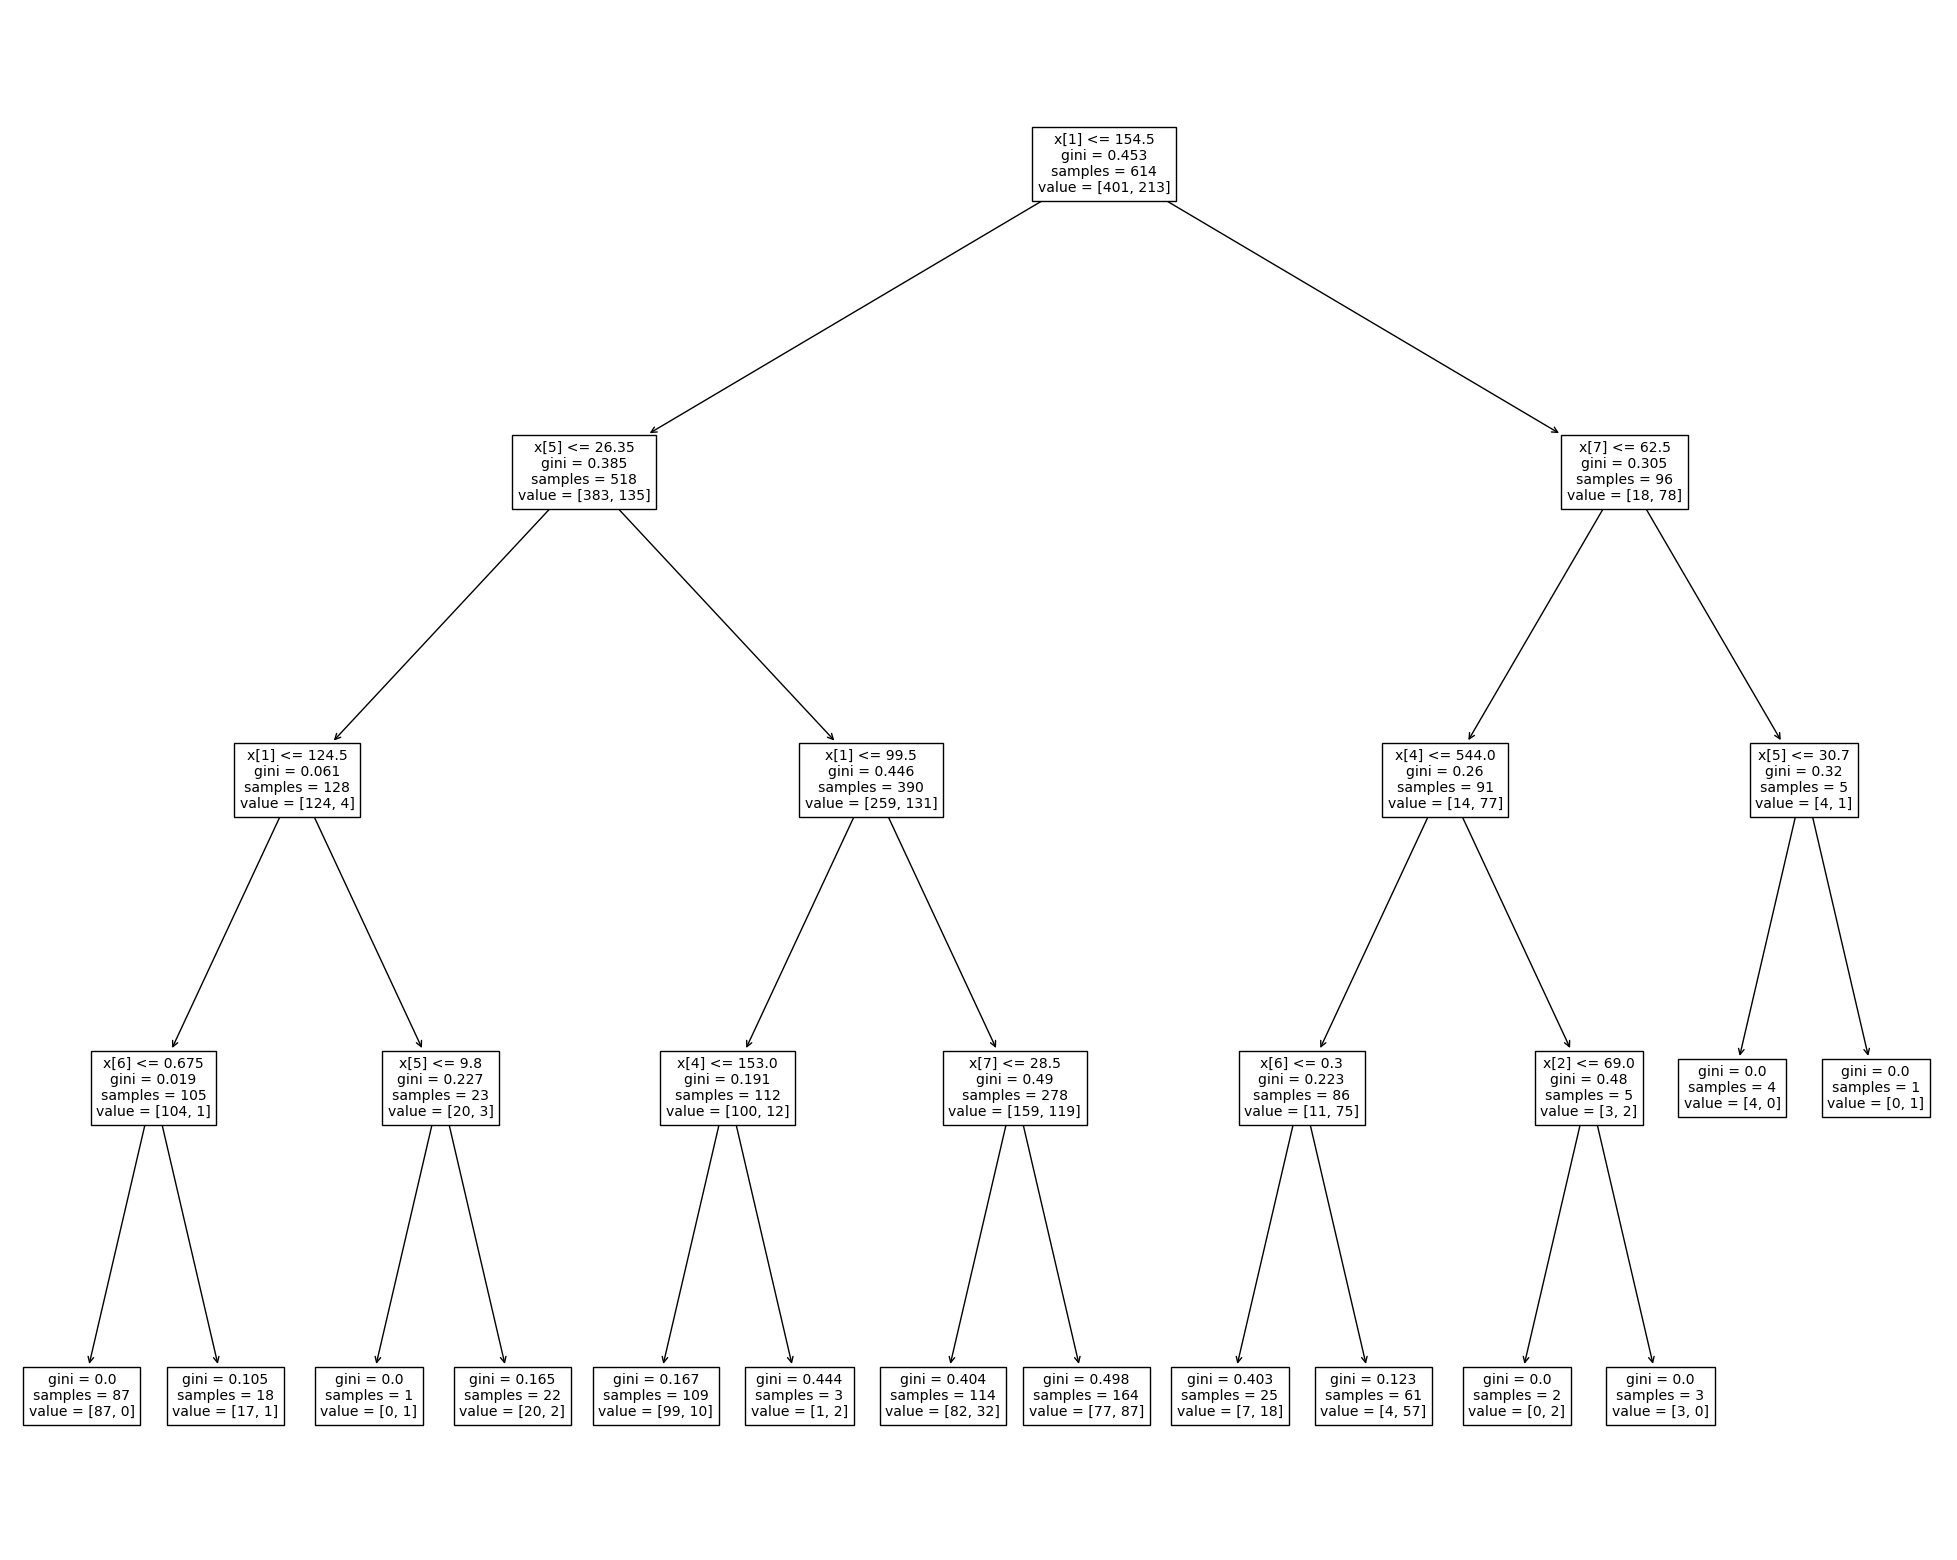

In [118]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model)

In [119]:
#!pip install graphviz


In [120]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

In [121]:
# ?pd.read_csv

In [122]:
# import graphviz 
# dot_data = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data) 
# graph.render("data") 
# graph

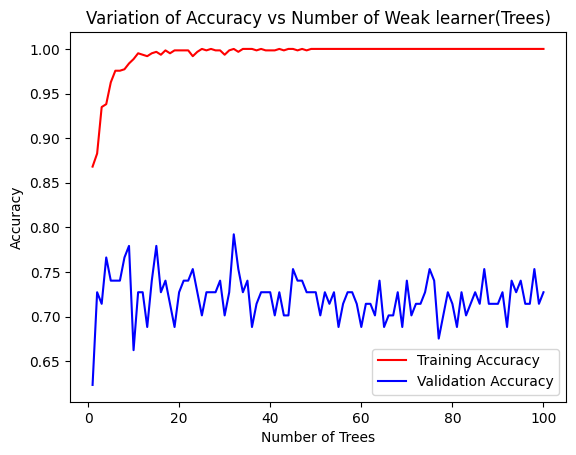

In [123]:
from sklearn.ensemble import RandomForestClassifier
accu_train = []
accu_val = []
for d in range (100):
    model= RandomForestClassifier(n_estimators = d+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs Number of Weak learner(Trees)")
plt.show()


1.0
0.7662337662337663
[[39 11]
 [ 7 20]]
0.6451612903225806
0.7407407407407407
0.689655172413793
0.7464936886395511


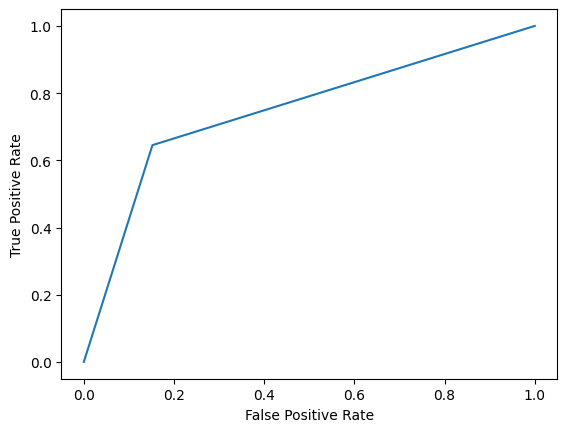

In [124]:
model =RandomForestClassifier(n_estimators = 68)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))

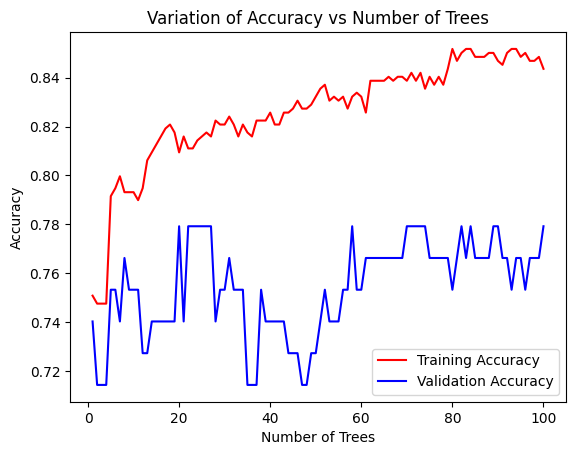

In [125]:
from sklearn.ensemble import AdaBoostClassifier
accu_train = []
accu_val = []
for d in range (100):
    model= AdaBoostClassifier(n_estimators = d+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs Number of Trees")
plt.show()


0.8469055374592834
0.7662337662337663
[[40 12]
 [ 6 19]]
0.6129032258064516
0.76
0.6785714285714285
0.741234221598878


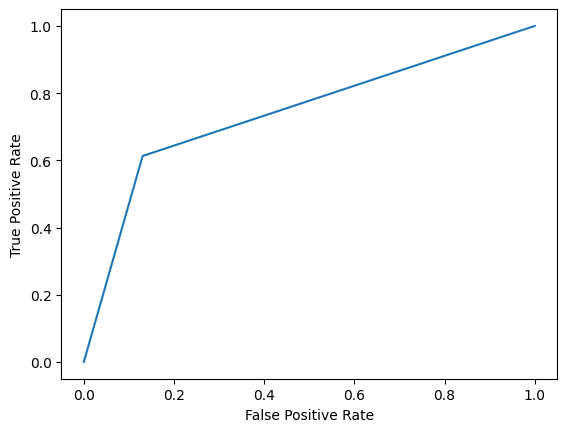

In [126]:
model =AdaBoostClassifier(n_estimators = 90)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))